https://www.extensionschool.ch/learn/programs/applied-data-science-machine-learning-v1/subjects/course-project-v5/units/part-2-house-prices-v1

In [1]:
# Import the necessary libraries
import pandas as pd
print('Pandas version:', pd.__version__)

import numpy as np
print('Numpy version:', np.__version__)

import sklearn
print('Sklearn version:', sklearn.__version__)

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


Pandas version: 0.20.3
Numpy version: 1.13.1
Sklearn version: 0.19.1


In [2]:
# Load the file into a Pandas DataFrame
df = pd.read_csv('house-prices/house-prices.csv')
print('DataFrame size:', df.shape)

DataFrame size: (2430, 82)


In [3]:
# Add a LogSalePrice variable to the DataFrame
df['LogSalePrice'] = np.log10(df['SalePrice'])

## Clean outliers about SalePrice

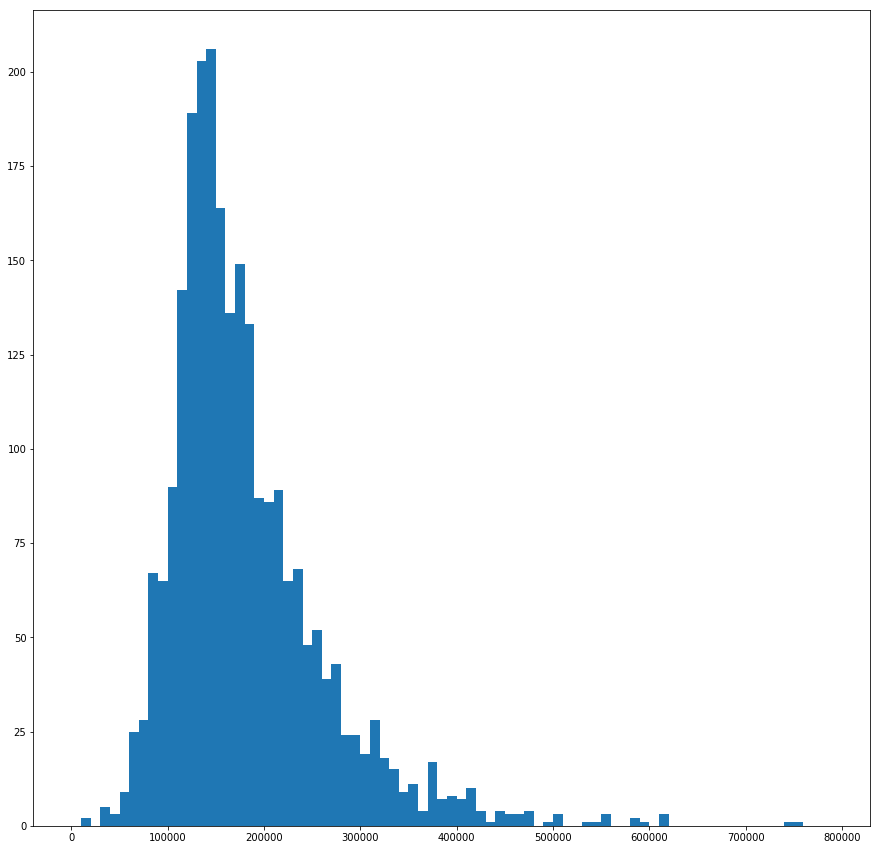

In [4]:

pc = df['SalePrice'].values
plt.figure(figsize=(15,15))
bins = np.arange(0, 800000, 10000)
plt.hist(pc, bins = bins)
plt.show()

In [5]:
# I decide to remove houuses with cost > 650000 $
df = df[df['SalePrice'] < 650000]
df.shape
# only two houses removed

(2428, 83)

## Cleaning categories not enough filled

In [6]:
df.notnull().sum().sort_values(ascending = False)

LogSalePrice      2428
Exter Qual        2428
Year Built        2428
Year Remod/Add    2428
Roof Style        2428
Roof Matl         2428
Exterior 1st      2428
Exterior 2nd      2428
Exter Cond        2428
Gr Liv Area       2428
Foundation        2428
Heating           2428
SalePrice         2428
Central Air       2428
1st Flr SF        2428
2nd Flr SF        2428
Overall Cond      2428
Overall Qual      2428
House Style       2428
Bldg Type         2428
Condition 2       2428
Condition 1       2428
Neighborhood      2428
Land Slope        2428
Lot Config        2428
Utilities         2428
Land Contour      2428
Lot Shape         2428
Street            2428
Lot Area          2428
                  ... 
Bedroom AbvGr     2428
Half Bath         2428
Full Bath         2428
BsmtFin SF 1      2427
BsmtFin SF 2      2427
Bsmt Unf SF       2427
Total Bsmt SF     2427
Electrical        2427
Garage Cars       2427
Garage Area       2427
Bsmt Full Bath    2426
Bsmt Half Bath    2426
Mas Vnr Typ

In [7]:
# Most of fields are filled. I just thor away categories with < 2200 records filled
df2 = df.dropna(axis=1, thresh=2200).copy()

#list of removed categories
set(df) - set(df2)

{'Alley', 'Fence', 'Fireplace Qu', 'Lot Frontage', 'Misc Feature', 'Pool QC'}

In [8]:
df2.isnull().sum().sort_values().tail(20)

BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Garage Cars         1
Garage Area         1
Bsmt Half Bath      2
Bsmt Full Bath      2
Mas Vnr Area       20
Mas Vnr Type       20
BsmtFin Type 1     71
Bsmt Cond          71
Bsmt Qual          71
BsmtFin Type 2     72
Bsmt Exposure      74
Garage Type       136
Garage Qual       138
Garage Finish     138
Garage Yr Blt     138
Garage Cond       138
dtype: int64

In [9]:
# About Garages. I keep only garages information when Type is defined
df3 = df2[~((df2['Garage Qual'].isnull() | df2['Garage Finish'].isnull() | df2['Garage Yr Blt'].isnull() | df2['Garage Cond'].isnull()) & ~df2['Garage Type'].isnull())]
df3.isnull().sum().sort_values().tail(20)

Exter Qual          0
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Electrical          1
Bsmt Half Bath      2
Bsmt Full Bath      2
Mas Vnr Area       20
Mas Vnr Type       20
Bsmt Qual          71
Bsmt Cond          71
BsmtFin Type 1     71
BsmtFin Type 2     72
Bsmt Exposure      74
Garage Qual       136
Garage Finish     136
Garage Yr Blt     136
Garage Type       136
Garage Cond       136
dtype: int64

In [10]:
# For Nominal/Ordinal categories, if NaN is on the column; There will be no feature with '1' in it.
# so I fill nan values :
# for Nominal fields : 'NA' string
    # => It's interesting to have also a feature for NA, for the ML algorithm
# for Ordinal value :  'mean' value 
    # => the way I choosed to not disturb too much the algorithm
# Numerical with average
    # => the way I choosed to not disturb too much the algorithm
values = {
            'Garage Qual': 'TA', 
            'Garage Finish': 'RFn', 
            'Garage Type': 'NA', 
            'Garage Cond' : 'TA', 
            'Garage Yr Blt' : df3['Garage Yr Blt'].mean(),
            'Bsmt Exposure' : 'Av',
            'BsmtFin Type 1' : 'Rec',
            'BsmtFin Type 2' : 'Rec',
            'Bsmt Cond' : 'TA',
            'Bsmt Qual' : 'TA',
            'Mas Vnr Type' : 'NA',
            'Mas Vnr Area' : df3['Mas Vnr Area'].mean(),
}

df4 = df3.fillna(value = values)

In [11]:
df4.isnull().sum().sort_values().tail(20)

Roof Matl         0
Exterior 1st      0
Exterior 2nd      0
Mas Vnr Type      0
Mas Vnr Area      0
Exter Qual        0
Exter Cond        0
BsmtFin Type 2    0
Roof Style        0
Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
Total Bsmt SF     1
BsmtFin SF 1      1
BsmtFin SF 2      1
Electrical        1
Bsmt Unf SF       1
Bsmt Full Bath    2
Bsmt Half Bath    2
dtype: int64

In [12]:
# For the remaining na, i just clear the record
df5 = df4.dropna()
df5.isnull().sum().sort_values().tail(20)

Year Built        0
Year Remod/Add    0
BsmtFin SF 2      0
BsmtFin Type 2    0
BsmtFin SF 1      0
BsmtFin Type 1    0
Bsmt Exposure     0
Bsmt Cond         0
Bsmt Qual         0
Total Bsmt SF     0
Foundation        0
Exter Qual        0
Mas Vnr Area      0
Mas Vnr Type      0
Exterior 2nd      0
Exterior 1st      0
Roof Matl         0
Roof Style        0
Exter Cond        0
LogSalePrice      0
dtype: int64

In [13]:
# Those two items has nothnig to do with sales prices
df6 = df5.drop(['PID', 'Order'], axis=1)
list(df6)

['MS SubClass',
 'MS Zoning',
 'Lot Area',
 'Street',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Functional',
 'Fireplaces',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Wood 

## Transform Ordinal Values


In [14]:
quality_features = ['Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Heating QC', 'Kitchen Qual','Garage Qual','Garage Cond']
df7 = df6.copy()
df7[quality_features] = df7[quality_features].replace({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})
df7['Lot Shape'] = df7['Lot Shape'].replace({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
df7['Land Slope'] = df7['Land Slope'].replace({'Gtl': 0, 'Mod': 1, 'Sev': 2})
df7['Bsmt Exposure'] = df7['Bsmt Exposure'].replace({'Gd': 3, 'Av': 2, 'Mn': 1, 'No' : 0})
BsmtFinTypes = ['BsmtFin Type 1', 'BsmtFin Type 2']
df7[BsmtFinTypes] = df7[BsmtFinTypes].replace({'GLQ': 5, 'ALQ': 4, 'BLQ': 3, 'Rec' : 2, 'LwQ' : 1, 'Unf' : 0})
df7['Electrical'] = df7['Electrical'].replace({'SBrkr': 4, 'FuseA': 3, 'FuseF': 2, 'FuseP' : 1, 'Mix' : 0})
df7['Functional'] = df7['Functional'].replace({'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod' : 4,'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal' : 0})
df7['Garage Finish'] = df7['Garage Finish'].replace({'Fin': 2, 'RFn': 1, 'Unf': 0})
df7['Paved Drive'] = df7['Paved Drive'].replace({'Y': 2, 'P': 1, 'N': 0})
#df7['Fence'] = df7['Fence'].replace({'GdPrv': 3, 'MnPrv': 2, 'GdWo': 1, 'MnWw' : 0})


In [15]:
#Special Process for Utilities
# For Utilities, I prefer adding columns for Gas, Water, Sewr
# We have more information in this column than a simple ordinal fiels. So we want ML to take advantage of that.

dGas = {'ELO': 0, 'NoSeWa': 1, 'NoSewr' : 1, 'AllPub': 1}
df7['Gas'] = df7['Utilities'].map(dGas)
dWater = {'ELO': 0, 'NoSeWa': 0, 'NoSewr' : 1, 'AllPub': 1}
df7['Water'] = df7['Utilities'].map(dWater)
dWater = {'ELO': 0, 'NoSeWa': 0, 'NoSewr' : 0, 'AllPub': 1}
df7['Sewr'] = df7['Utilities'].map(dWater)
df8 = df7.drop('Utilities', axis=1)


## Nominal Values

In [16]:
# One-hot encoding
nominalFeatures = [
'MS SubClass',
'MS Zoning',
'Street',
'Land Contour',
'Lot Config',
'Neighborhood',
'Condition 1',
'Condition 2',
'Bldg Type',
'House Style',
'Roof Style',
'Roof Matl',
'Exterior 1st',
'Exterior 2nd',
'Mas Vnr Type',
'Foundation',
'Heating',
'Garage Type',
#'Misc Feature',
'Sale Type',
'Sale Condition']
df9 = pd.get_dummies(df8, columns=nominalFeatures)

In [17]:
# special process for Central air (2 possible choices, I prefer to keep only one hot vector)
df9['Central Air'] = df9['Central Air'].map({'Y' : 1, 'N': 0})


## Last Check . Do we have only numerical values ?

In [18]:
df9.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('uint8')], dtype=object)

## Feature engineering

In [19]:
#Let's take a look to z-scores for the features
# I need to discard the one-hot vectors where z score doest mean anything
pd.set_option('display.max_rows', 300)
(abs(df9 - df9.mean())/df9.std(ddof=0)).max()

Lot Area                  24.623081
Lot Shape                  4.486328
Land Slope                 7.601365
Overall Qual               3.606533
Overall Cond               4.093878
Year Built                 3.187078
Year Remod/Add             1.649020
Mas Vnr Area               8.576545
Exter Qual                 2.771908
Exter Cond                 5.528029
Bsmt Qual                  3.671581
Bsmt Cond                  6.865326
Bsmt Exposure              2.144837
BsmtFin Type 1             1.296168
BsmtFin SF 1              11.404603
BsmtFin Type 2             4.719824
BsmtFin SF 2               8.559376
Bsmt Unf SF                4.046969
Total Bsmt SF             11.428677
Heating QC                 3.271427
Central Air                3.663689
Electrical                10.069604
1st Flr SF                10.146994
2nd Flr SF                 3.686194
Low Qual Fin SF           22.409801
Gr Liv Area                8.528332
Bsmt Full Bath             4.859143
Bsmt Half Bath             8

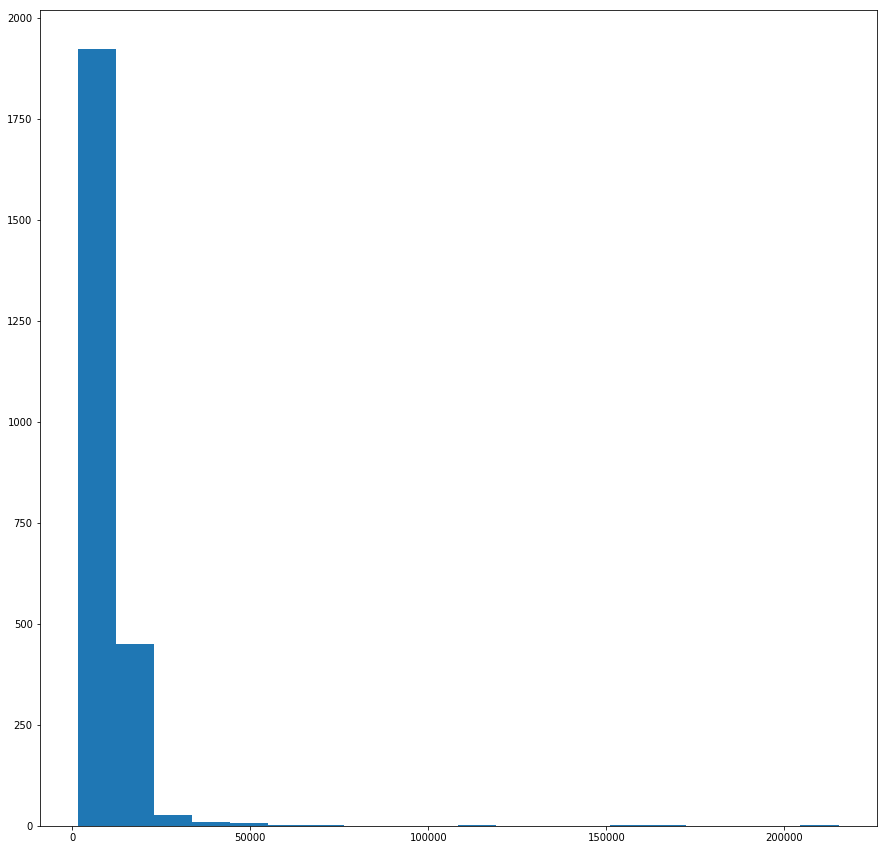

In [20]:
# We can notice that oftenly areas have high z-score.
# let's take a look to 'Lot Area' for instance

pc = df9['Lot Area'].values
plt.figure(figsize=(15,15))
plt.hist(pc, bins = 20)
plt.show()

# We can see that it's not really due to outliers, but rather to the distribution.

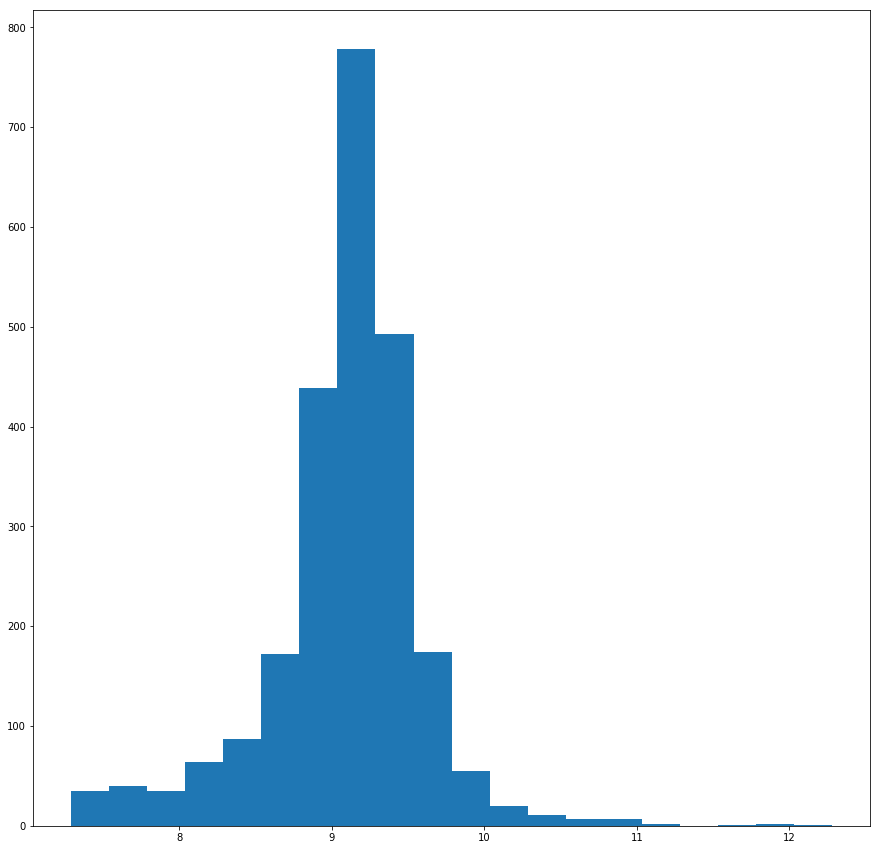

In [21]:
# let's take a look to the log of the 'Lot Area'
pc = np.log(df9['Lot Area'].values)
plt.figure(figsize=(15,15))
plt.hist(pc, bins = 20)
plt.show()

# Sounds better 

In [22]:
# I decide to add the log of all the areas feature as new features
AreasFeatures = ['Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area']

# Areas are positive values. I first add '1' to every colums so i have positive values 
#and this way I avoid division per 0 when area is not consistant
df_areas = df9[AreasFeatures]
dflog = np.log(np.add(1, df_areas)).add_suffix('_log')
dflog.describe()

,Lot Area_log,Mas Vnr Area_log,BsmtFin SF 1_log,BsmtFin SF 2_log,Bsmt Unf SF_log,Total Bsmt SF_log,1st Flr SF_log,2nd Flr SF_log,Low Qual Fin SF_log,Gr Liv Area_log,Garage Area_log,Wood Deck SF_log,Open Porch SF_log,Enclosed Porch_log,3Ssn Porch_log,Screen Porch_log,Pool Area_log
count,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000
mean,9.097108,2.137093,4.231318,0.696181,5.599617,6.722772,7.003448,2.773873,0.070813,7.254761,5.801181,2.438794,2.332197,0.740134,0.062412,0.463576,0.027627
std,0.511395,2.625529,2.984071,1.898812,1.896605,1.208884,0.321456,3.262532,0.637369,0.319807,1.462446,2.593563,2.149855,1.752348,0.570354,1.478953,0.410385
min,7.293698,0.000000,0.000000,0.000000,0.000000,0.000000,5.814131,0.000000,0.000000,5.814131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.919854,0.000000,0.000000,0.000000,5.379897,6.678342,6.781058,0.000000,0.000000,7.021976,5.782284,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.159152,0.000000,5.929589,0.000000,6.137727,6.898715,6.991177,0.000000,0.000000,7.273093,6.171701,0.000000,3.332205,0.000000,0.000000,0.000000,0.000000
75%,9.358847,5.105945,6.603266,0.000000,6.683986,7.169735,7.234537,6.546065,0.000000,7.461928,6.357842,5.129899,4.262680,0.000000,0.000000,0.000000,0.000000
max,12.279537,7.378384,8.638525,7.331060,7.756623,8.717846,8.536211,7.529943,6.970730,8.638171,7.305860,7.261927,6.610696,6.920672,6.232448,6.196444,6.685861


In [23]:
# Add those columns into dataset for the complex model
df10 = df9.join(dflog)

In [24]:
# Let's compute total area by adding all the areas
df10['Total Area'] = df_areas.sum(axis = 1)

In [25]:
# Sold Date : transform Month and Year into one only column, better for the algorithm
df10['Date Sold'] = df10['Mo Sold'] - 1 + ( df10['Yr Sold'] - df10['Yr Sold'].min()) * 12
df10['Date Sold'].describe()
df11 = df10.drop(['Mo Sold', 'Yr Sold'], axis=1)

In [26]:
# In order to better take better advantage of House Style. I add a feature telling if we have two stories
df11['HasTwoStories'] =  df10['House Style_2.5Fin'] | df10['House Style_2.5Unf'] | df10['House Style_2Story']


In [27]:
# We don't take TotRmsAbvGrd to avoid redudancy while summing
df11['Rooms Total']  = df11[['Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr' ]].sum(axis = 1)
df11.shape

(2423, 254)

In [32]:
# I add polynumial feature to all continuous features (degree = 4)
ContinuousFeatures = AreasFeatures.copy()
ContinuousFeatures.append('Misc Val')
df12 = df11.join(np.square(df11[ContinuousFeatures]).add_suffix('_x2'))
df12 = df12.join(np.power(df11[ContinuousFeatures], 3).add_suffix('_x3'))
df12 = df12.join(np.power(df11[ContinuousFeatures], 4).add_suffix('_x4'))
df12.shape

(2423, 308)